In [2]:
import zipfile
import os


zip_path = "/content/Social.zip"
extract_to = "/content/unzipped/"


os.makedirs(extract_to, exist_ok=True)


with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print(f"Unzipped to: {extract_to}")

Unzipped to: /content/unzipped/


In [3]:
import os
print(os.listdir(extract_to))

['Social_Network_Ads.csv']


In [5]:
import pandas as pd


csv_path = '/content/Social.zip'
df = pd.read_csv(csv_path)
df.head()


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns



if "User ID" in df.columns:
    df.drop(columns=["User ID"], inplace=True)


# 3. Encode Gender
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])

# 4. Encode Target Variable
df['Purchased'] = LabelEncoder().fit_transform(df['Purchased'])

# 5. Feature Scaling
scaler = StandardScaler()
df[['Age', 'EstimatedSalary']] = scaler.fit_transform(df[['Age', 'EstimatedSalary']])


X = df[['Age', 'EstimatedSalary']]
y = df['Purchased']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


def evaluate_model(name, model):
    y_pred = model.predict(X_test)
    print(f"\n{name} Results:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1-Score:", f1_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens')
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()





Gaussian Naive Bayes Results:
Accuracy: 0.9
Precision: 0.8928571428571429
Recall: 0.78125
F1-Score: 0.8333333333333334
Confusion Matrix:
 [[65  3]
 [ 7 25]]


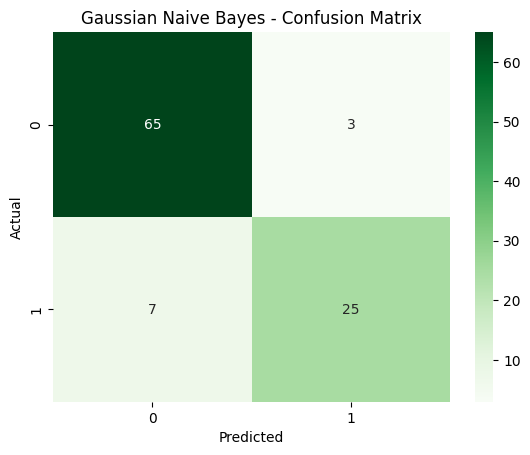


K-Nearest Neighbors (k=3) Results:
Accuracy: 0.93
Precision: 0.8787878787878788
Recall: 0.90625
F1-Score: 0.8923076923076924
Confusion Matrix:
 [[64  4]
 [ 3 29]]


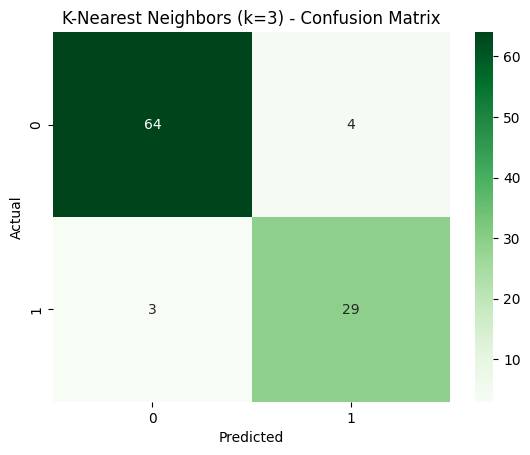


K-Nearest Neighbors (k=5) Results:
Accuracy: 0.93
Precision: 0.8787878787878788
Recall: 0.90625
F1-Score: 0.8923076923076924
Confusion Matrix:
 [[64  4]
 [ 3 29]]


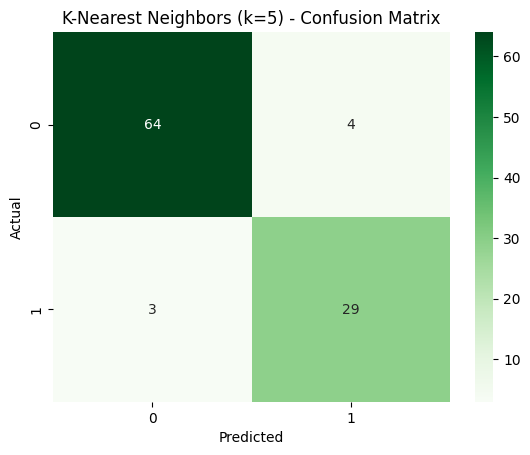


K-Nearest Neighbors (k=7) Results:
Accuracy: 0.93
Precision: 0.8787878787878788
Recall: 0.90625
F1-Score: 0.8923076923076924
Confusion Matrix:
 [[64  4]
 [ 3 29]]


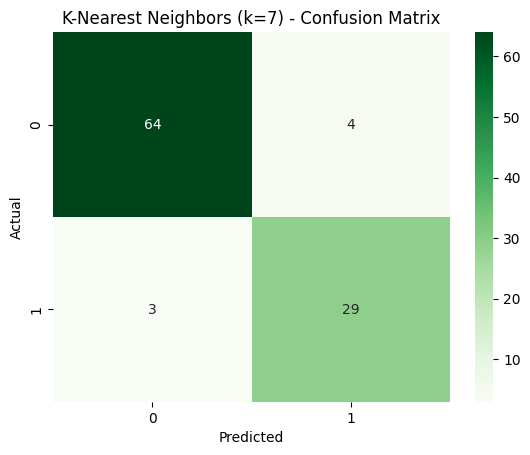


Decision Tree (Gini) Results:
Accuracy: 0.9
Precision: 0.8235294117647058
Recall: 0.875
F1-Score: 0.8484848484848485
Confusion Matrix:
 [[62  6]
 [ 4 28]]


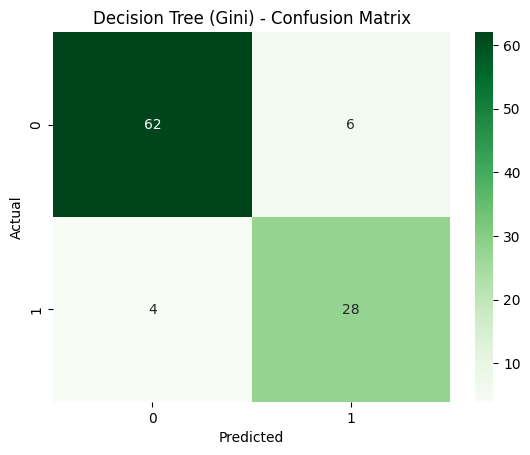


Decision Tree (Entropy) Results:
Accuracy: 0.91
Precision: 0.8285714285714286
Recall: 0.90625
F1-Score: 0.8656716417910447
Confusion Matrix:
 [[62  6]
 [ 3 29]]


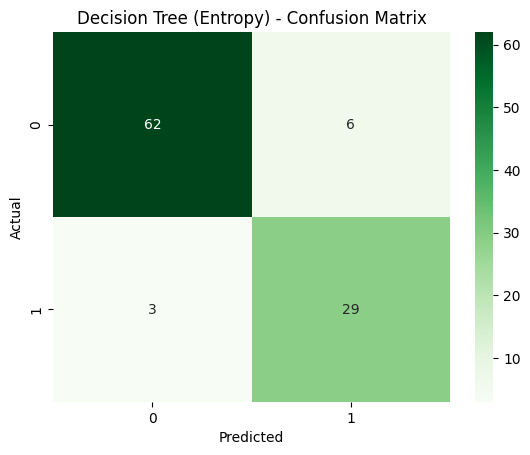

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns



gnb = GaussianNB()
gnb.fit(X_train, y_train)
evaluate_model("Gaussian Naive Bayes", gnb)

for k in [3, 5, 7]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    evaluate_model(f"K-Nearest Neighbors (k={k})", knn)

# Decision Tree - Gini
dt_gini = DecisionTreeClassifier(criterion='gini', random_state=0)
dt_gini.fit(X_train, y_train)
evaluate_model("Decision Tree (Gini)", dt_gini)

# Decision Tree - Entropy
dt_entropy = DecisionTreeClassifier(criterion='entropy', random_state=0)
dt_entropy.fit(X_train, y_train)
evaluate_model("Decision Tree (Entropy)", dt_entropy)
